# 📊 E-Commerce Customer & Cohort Analysis

## Project Overview
This project analyzes customer purchasing behavior using an e-commerce
transactional dataset. The objective is to understand revenue trends,
customer retention, and cohort-based behavior over time.

**Key Techniques Used:**
- Data cleaning and preprocessing
- Revenue and customer metrics
- Monthly trend analysis
- Cohort and retention analysis

**Tools:** Python, Pandas, Matplotlib, Seaborn, Jupyter Notebook


## 📁 Dataset Overview
- Source: UK Online Retail Dataset
- Rows: ~500K
- Time Period: 2010–2011


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("../data/cleaned_ecommerce_data.csv")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
df = pd.read_csv("../data/cleaned_ecommerce_data.csv")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 📌 Key Business Metrics

This section calculates high-level business KPIs including:
- Total number of unique customers
- Total number of orders
- Total revenue generated

These metrics provide a quick overview of the scale and performance
of the e-commerce business.


In [4]:
print("Total Customers:", df["CustomerID"].nunique())
print("Total Orders:", df["InvoiceNo"].nunique())
print("Total Revenue:", df["TotalPrice"].sum())


Total Customers: 4339
Total Orders: 18536
Total Revenue: 8911407.904


## 📈 Monthly Revenue Trend

Invoice dates are converted to datetime format to enable time-based
analysis. Revenue is then aggregated at a monthly level to identify
seasonality, growth patterns, and revenue fluctuations over time.


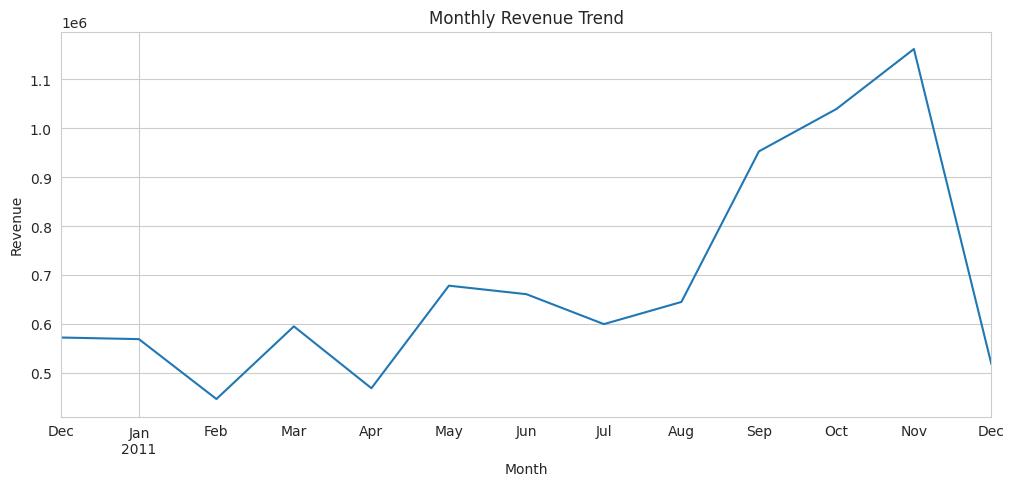

In [5]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")

monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum()

monthly_revenue.plot(figsize=(12,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


## 👥 Cohort Construction & Tracking Logic

Cohort analysis is used to understand customer retention and repeat
purchase behavior over time. In this analysis, customers are grouped
into cohorts based on the month of their first purchase, and their
subsequent activity is tracked across monthly intervals.

### Cohort Month
The cohort month represents the month in which a customer made their
first-ever purchase. It is derived by identifying the minimum invoice
date for each customer and converting it to a monthly period. This
serves as the reference point for tracking customer behavior over time.

### Cohort Index
The cohort index measures the number of months that have passed since
a customer’s first purchase. An index value of 1 represents the cohort
month itself, while higher values indicate subsequent months. This
metric allows us to analyze how long customers continue to engage with
the business after acquisition.

### Cohort Table
The cohort table aggregates the number of unique customers for each
combination of cohort month and cohort index. This structured format
enables easy visualization of customer retention patterns and serves
as the foundation for retention analysis and cohort heatmaps.


In [6]:
df["CohortMonth"] = (
    df.groupby("CustomerID")["InvoiceDate"]
      .transform("min")
      .dt.to_period("M")
)


In [7]:
df["CohortIndex"] = (
    (df["InvoiceDate"].dt.year - df["CohortMonth"].dt.year) * 12 +
    (df["InvoiceDate"].dt.month - df["CohortMonth"].dt.month) + 1
)


In [8]:
cohort_data = (
    df.groupby(["CohortMonth", "CohortIndex"])["CustomerID"]
      .nunique()
      .reset_index()
)

cohort_pivot = cohort_data.pivot(
    index="CohortMonth",
    columns="CohortIndex",
    values="CustomerID"
)

cohort_pivot


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Customer Retention Cohort Analysis

Retention is calculated as the percentage of customers from each cohort
who make repeat purchases in subsequent months. The heatmap visualization
highlights customer churn and loyalty patterns across cohorts.



In [9]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

retention


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


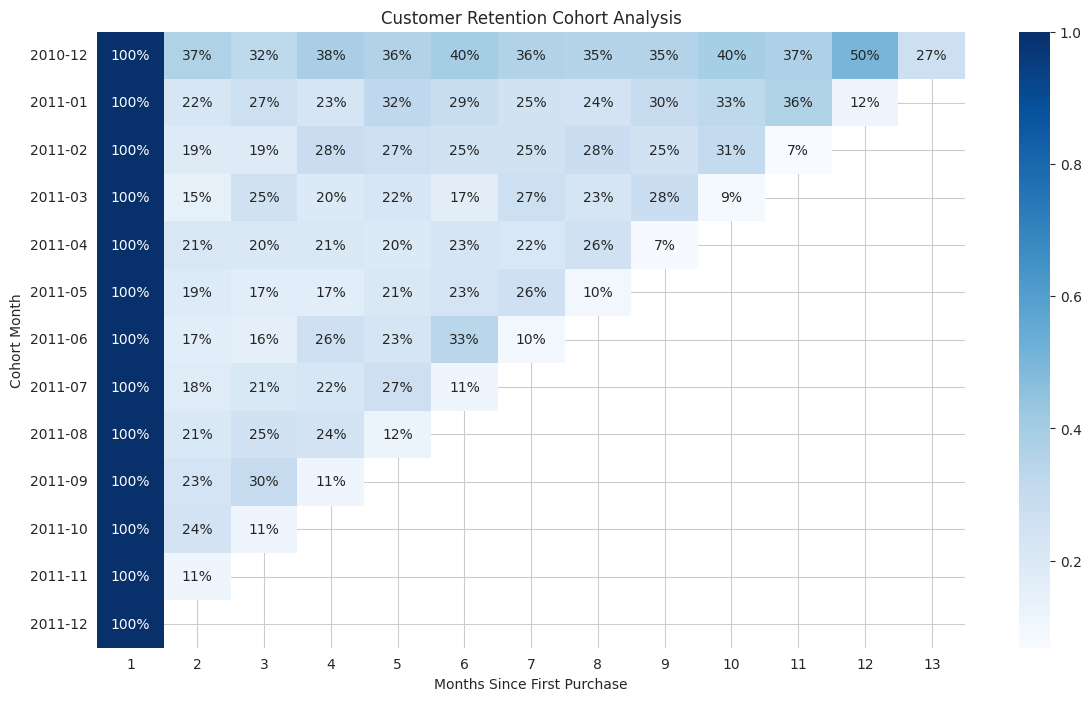

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since First Purchase")
plt.show()


## 🔍 Key Insights
- Customer retention is highest in the first 2–3 months
- Later cohorts show faster churn
- Repeat customers drive significant revenue


In [11]:
plt.savefig("../outputs/cohort_heatmap.png")


<Figure size 640x480 with 0 Axes>

## Key Insights

- Customer retention is highest in the first 2–3 months after acquisition.
- Retention declines steadily over time, indicating customer churn.
- Certain cohorts show stronger retention, possibly due to seasonal
  or promotional effects.
- A significant portion of revenue is driven by repeat customers.
